In [3]:
#Step 1: Importing all of our dependencies
from __future__ import division , print_function, unicode_literals
import numpy as np
import math
import matplotlib.pyplot as plt

#Step 2: create our own ramdon data

#it will give back the same sequence of number
#everytime we run the code random seen we
#declared the seed 
np.random.seed(2) 

#it will likely give you a random vector 1000 rows
#with 1 column ==> they will be the same everytime
#we run the code since we declared the random.seed()
X = np.random.rand(1000,1)
#the function y = 4 + 3x with noise added is
#.2*np.random.randn(1000,1)
y = 4 + 3*X+.2*np.random.randn(1000,1) 



In [23]:
# Step 3:Creating Xbar 
ones = np.ones((X.shape[0], 1))
Xbar = np.concatenate((ones, X), axis = 1)

#Step 4: we are going to apply the formular to 
#calculate our weight to derive our fitting line
# y0 = w_0 + w_1*0

A = np.dot(Xbar.T, Xbar) #A is the dot product of Xbar and Xbar transpose
b = np.dot(Xbar.T, y)
w_1r = np.dot(np.linalg.pinv(A),b)

print("The solution i found is w = ", w_1r.T)

#Step 5: Computing our solution

w = w_1r
w_0 = w[0][0]
w_1 = w[1][0]
#take 2 point in the range [0,1]
# which is equaly seperate and take the endpoints
x0 = np.linspace(0,1,2,endpoint = True)
y0 = x0*w_1 + w_0

The solution i found is w =  [[4.0071715  2.98225924]]


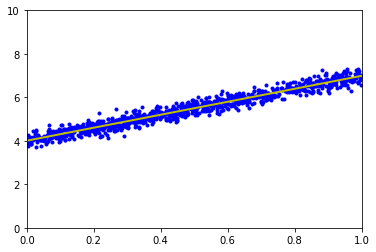

In [24]:
#Step 6: Drawing our result:
plt.plot(X.T, y.T, 'b.') #our data
plt.plot(x0,y0,'y', linewidth = 2) #our fitting line
plt.axis([0,1,0,10]) #Declaring our axis x = [0,1] ,y = [0,10]
plt.show()

In [36]:
#Step 7: Applying formular for gradient descent 
#and lost function
def grad(w):
    #This is the length of the sequence
    N = Xbar.shape[0]
    return ((1/N)*Xbar.T.dot(Xbar.dot(w) - y))

def cost(w):
    #This is the length of the sequence
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;


In [50]:
#Now we can add a small function to quarantee that 
#our gradient descent is close to be correct
def numerical_grad(w,cost):
    eps =1e-4
    g = np.zeros_like(w) #Matrix g will be same size with w but full of 0
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g

def check_grad(w,cost,grad):
    w = np.random.rand(w.shape[0],w.shape[1])
    grad1 = grad(w) #Check the W with our gradient
    grad2 = numerical_grad(w,cost) #Check with the numerical gradient
    print(grad1)
    print(grad2)
    #comparison
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print("Checking gradient...." , check_grad(np.random.rand(2,1), cost, grad))

[[-4.55420566]
 [-2.42646427]]
[[-4.55420566]
 [-2.42646427]]
Checking gradient.... True
